In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
mouse_drug_data_to_load = pd.read_csv("data/mouse_drug_data.csv")
mouse_drug_data_to_load.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [14]:
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")
clinical_trial_data_to_load.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [17]:
combined_csv_df = pd.merge(mouse_drug_data_to_load,clinical_trial_data_to_load, on="Mouse ID" )
combined_csv_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [105]:
combined_csv_df.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [ ]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [43]:
tumorMean = combined_csv_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
type(tumorMean)

pandas.core.series.Series

In [44]:
tumor_df = pd.DataFrame(tumorMean).reset_index()
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


## Tumor Response to Treatment

In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [40]:
tumorSem = combined_csv_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
type(tumorSem)

pandas.core.series.Series

In [41]:
tumor_df_sem = pd.DataFrame(tumorSem).reset_index()
tumor_df_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [45]:
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [50]:
tumor_munging_df = tumor_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_munging_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [52]:
tumor_munging_df_sem = tumor_df_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_munging_df_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure



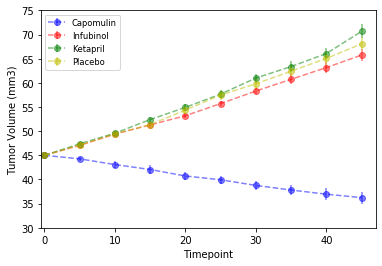

In [76]:
fig, ax = plt.subplots()

ax.errorbar(tumor_munging_df.index, tumor_munging_df.Capomulin, yerr=tumor_munging_df_sem.Capomulin, 
            fmt="o", color="b", ls="--",
            alpha=0.5, label="Capomulin")

ax.errorbar(tumor_munging_df.index, tumor_munging_df.Infubinol, yerr=tumor_munging_df_sem.Infubinol, 
            fmt="o", color="r", ls="--",
            alpha=0.5, label="Infubinol")

ax.errorbar(tumor_munging_df.index, tumor_munging_df.Ketapril, yerr=tumor_munging_df_sem.Ketapril, 
            fmt="o", color="g", ls="--",
            alpha=0.5, label="Ketapril")

ax.errorbar(tumor_munging_df.index, tumor_munging_df.Placebo, yerr=tumor_munging_df_sem.Placebo, 
            fmt="o", color="y", ls="--",
            alpha=0.5, label="Placebo")

ax.set_xlim(-0.5,47)
ax.set_ylim(30, 75)

ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()

Per graph Capomulin volume is decreasing and Ketapril, Infubinol, and Placebo is increasing

In [ ]:
# Show the Figure


## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [78]:
siteMean = combined_csv_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
type(siteMean)

pandas.core.series.Series

In [79]:
site_df = pd.DataFrame(siteMean).reset_index()
site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [80]:
siteSem = combined_csv_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
type(siteSem)

pandas.core.series.Series

In [81]:
site_df_sem = pd.DataFrame(siteSem).reset_index()
site_df_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [84]:
site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [86]:
site_munging_df = site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
site_munging_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [87]:
site_munging_df_sem = site_df_sem.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
site_munging_df_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


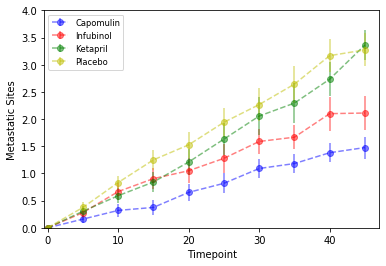

In [90]:
fig, ax = plt.subplots()

ax.errorbar(site_munging_df.index, site_munging_df.Capomulin, yerr=site_munging_df_sem.Capomulin, 
            fmt="o", color="b", ls="--",
            alpha=0.5, label="Capomulin")

ax.errorbar(site_munging_df.index, site_munging_df.Infubinol, yerr=site_munging_df_sem.Infubinol, 
            fmt="o", color="r", ls="--",
            alpha=0.5, label="Infubinol")

ax.errorbar(site_munging_df.index, site_munging_df.Ketapril, yerr=site_munging_df_sem.Ketapril, 
            fmt="o", color="g", ls="--",
            alpha=0.5, label="Ketapril")

ax.errorbar(site_munging_df.index, site_munging_df.Placebo, yerr=site_munging_df_sem.Placebo, 
            fmt="o", color="y", ls="--",
            alpha=0.5, label="Placebo")

ax.set_xlim(-0.5,47)
ax.set_ylim(0, 4)

ax.set_xlabel("Timepoint")
ax.set_ylabel("Metastatic Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [114]:
survivalCount = combined_csv_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
type(survivalCount)

pandas.core.series.Series

In [115]:
survival_df = pd.DataFrame(survivalCount).reset_index()
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


KeyError: 'Mouse Count'

In [116]:
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [121]:
survival_munging_df = survival_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
survival_munging_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


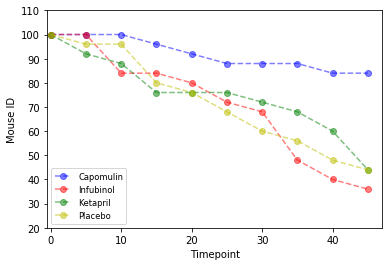

In [132]:
fig, ax = plt.subplots()

ax.plot(survival_munging_df.index, survival_munging_df.Capomulin/25*100,
            marker="o", color="b", ls="--",
            alpha=0.5, label="Capomulin")

ax.plot(survival_munging_df.index, survival_munging_df.Infubinol/25*100, 
            marker="o", color="r", ls="--",
            alpha=0.5, label="Infubinol")

ax.plot(survival_munging_df.index, survival_munging_df.Ketapril/25*100,  
            marker="o", color="g", ls="--",
            alpha=0.5, label="Ketapril")

ax.plot(survival_munging_df.index, survival_munging_df.Placebo/25*100,
            marker="o", color="y", ls="--",
            alpha=0.5, label="Placebo")

ax.set_xlim(-0.5,47)
ax.set_ylim(20, 110)

ax.set_xlabel("Timepoint")
ax.set_ylabel("Mouse ID")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Per chart all Mouse ID are decreasing

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [139]:
percent_change = 100 * (tumor_munging_df.iloc[-1] - tumor_munging_df.iloc[0]) / tumor_munging_df.iloc[0]
percent_change_sem = 100 * (tumor_munging_df_sem.iloc[-1] - tumor_munging_df_sem.iloc[0]) / tumor_munging_df_sem.iloc[0]
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [146]:
percents = [percent_change.Capomulin, percent_change.Infubinol, percent_change.Ketapril, percent_change.Placebo]
percents

[-19.475302667894173, 46.12347172785188, 57.028794686606076, 51.29796048315153]

In [162]:
Drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
Drugs
pers = pd.Series(percents,index=Drugs)
pers

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

<BarContainer object of 4 artists>

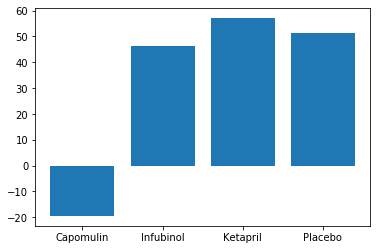

In [149]:
plt.bar(Drugs, percents)

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

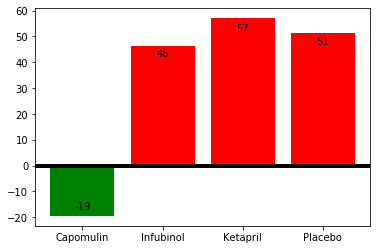

In [164]:
fig, ax = plt.subplots()


rects = ax.bar(pers.index, pers,
              color=['green' if per < 0 else 'red' for per in pers])
plt.axhline(y=0, color = "k", linewidth=4)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .9*height,
                '%d'% int(height),
                ha='center' , va='bottom')
autolabel(rects)

plt.show()

Per chart Capomulin is decreasing and all other drugs are increasing